# Exercícios:



<br>
Módulo 7 - Pré-processamento
<br>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

<br>

**1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.**

In [4]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


<br>

**2 - Quais as dimensões do dataframe?**

In [5]:
df.shape

(29170, 9)

**R: O dataframe possui 29.170 linhas e 9 colunas**

<br>

**3 - Qual o tipo das variáveis?**

In [6]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

**R: Há variáveis numéricas (float e int) e categóricas (object), conforme output da linha anterior.**

<br>

**4 - Existem variáveis faltantes no dataset? Quais?**

In [7]:
print('Quantidades de dados faltantes por variável:')
df.isnull().sum()

Quantidades de dados faltantes por variável:


idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [8]:
print('Percentual de dados faltantes por variável:')
round((df.isnull().sum() / df.shape[0]) * 100,2)

Percentual de dados faltantes por variável:


idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64

**R: As varíaveis 'nome' e 'dívida' estão ausentes em todas as entradas / linhas. Podemos eliminá-las do dataframe.<br>
A variável 'idade' possui poucos dados faltantes (0,34%). Estes dados podem ser tratados para serem utilizados nas análises.**

<br>

**5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?**

In [9]:
df['estado_civil'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated',
       'Married-AF-spouse', 'Widowed', 'Married-spouse-absent'],
      dtype=object)

In [10]:
df['cor'].unique()

array(['White', 'Black', 'Other', 'Asian-Pac-Islander',
       'Amer-Indian-Eskimo'], dtype=object)

In [11]:
df['sexo'].unique()

array(['Male', 'Female', '?'], dtype=object)

In [12]:
round(df['sexo'].value_counts() / df.shape[0] * 100,2)

Male      62.33
Female    31.03
?          6.64
Name: sexo, dtype: float64

**R: Na variável sexo 6,64% dos valores são da categoria "?". Podemos interpretar esta categoria como um dado faltante,já que não há, em princípio, outras categorias possíveis para a variável 'sexo' neste conjunto de dados.
<br>
Em se tratando de uma variável com poucos valores faltantes em relação ao total do dataframe, podemos substituir os valores '?' pela moda (valores mais frequentes)**

<br>

**6 - Faça um tratamento nas variáveis faltantes.**

In [13]:
# vamos eliminar do dataframe as colunas 'nome' e dívida, pois não apresentam nenhum dado

df1 = df.drop(columns=['nome','dívida'])
df1.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K


In [14]:
# variável 'idade': é numérica. Vamos preencher os valores faltantes com a média dos valores conhecidos

media_idade = round(df1.idade.mean(),1)
media_idade

38.7

In [15]:
df1.idade.fillna(media_idade,inplace=True)

In [16]:
df1.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

In [17]:
# variável 'sexo' é categórica. Vamos substituir os valores '?' (consideramos valores faltantes) pela moda

moda_sexo = df1.sexo.value_counts().idxmax()
df1.sexo = np.where(df1.sexo == '?',moda_sexo,df1.sexo)

In [18]:
df1.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

<br>

**7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.**

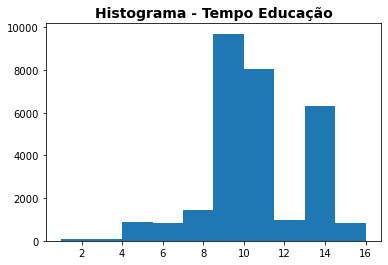

In [19]:
plt.title('Histograma - Tempo Educação',fontsize=14, fontweight='bold')
plt.hist(df1.tempo_educacao)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
mm_scaler = MinMaxScaler()

In [22]:
X = df1.tempo_educacao.values.reshape(-1,1)

In [23]:
mm_scaler.fit(X)

MinMaxScaler()

In [24]:
df1['tempo_educacao_norm'] = mm_scaler.transform(X).round(4)

In [25]:
df1.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,tempo_educacao_norm
0,39.0,13,Never-married,White,Male,40,<=50K,0.8000
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.8000
2,38.0,9,Divorced,White,Male,40,<=50K,0.5333
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.4000
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.8667


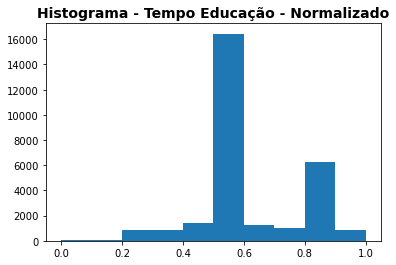

In [26]:
plt.title('Histograma - Tempo Educação - Normalizado',fontsize=14, fontweight='bold')
plt.hist(df1.tempo_educacao_norm)
plt.show()

In [27]:
ss_scaler = StandardScaler()

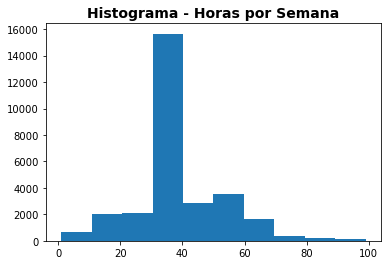

In [28]:
plt.title('Histograma - Horas por Semana',fontsize=14, fontweight='bold')
plt.hist(df1.horas_por_semana)
plt.show()

In [29]:
Y = df1.horas_por_semana.values.reshape(-1,1)
Y

array([[40],
       [13],
       [40],
       ...,
       [40],
       [20],
       [40]], dtype=int64)

In [30]:
ss_scaler.fit(Y)
df1['horas_por_semana_norm'] = ss_scaler.transform(Y)

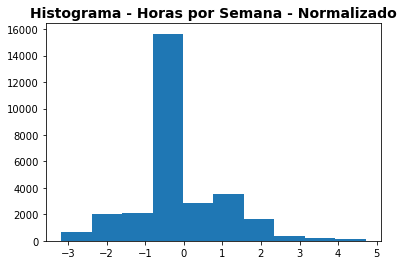

In [31]:
plt.title('Histograma - Horas por Semana - Normalizado',fontsize=14, fontweight='bold')
plt.hist(df1.horas_por_semana_norm)
plt.show()

In [32]:
round(df1.horas_por_semana_norm.describe(),4)

count    29170.0000
mean         0.0000
std          1.0000
min         -3.1769
25%         -0.0361
50%         -0.0361
75%          0.3666
max          4.7155
Name: horas_por_semana_norm, dtype: float64

<br>

**8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.**

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe = OneHotEncoder()

In [35]:
variavel_ohe = df1.estado_civil.values.reshape(-1,1)
ohe.fit(variavel_ohe)

OneHotEncoder()

In [36]:
ohe.transform(variavel_ohe)

<29170x7 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [37]:
ohe.transform(variavel_ohe).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [38]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [39]:
df_OHE1 = pd.DataFrame (ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())

In [40]:
variavel_ohe = df1.cor.values.reshape(-1,1)
ohe.fit(variavel_ohe)
df_OHE2 = pd.DataFrame (ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())

In [41]:
variavel_ohe = df1.sexo.values.reshape(-1,1)
ohe.fit(variavel_ohe)
df_OHE3 = pd.DataFrame (ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())

In [42]:
df1 = pd.concat([df1,df_OHE1,df_OHE2,df_OHE3],axis=1)

In [43]:
df1.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,tempo_educacao_norm,horas_por_semana_norm,Divorced,...,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,13,Never-married,White,Male,40,<=50K,0.8000,-0.03606,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.8000,-2.21050,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,0.5333,-0.03606,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.4000,-0.03606,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.8667,-0.03606,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<br>

**9 - Detecte e elimine os outliers da variável 'idade'.**

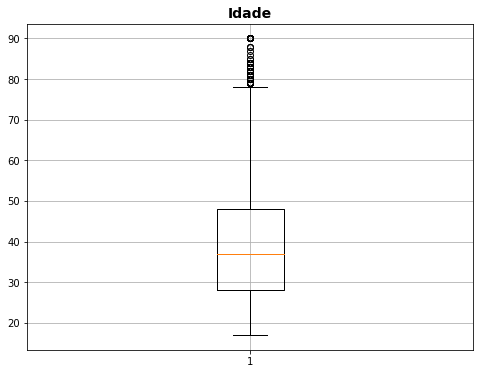

In [44]:
plt.figure(figsize = [8,6])
plt.title('Idade',fontsize = 14,fontweight = 'bold')
plt.grid()
plt.boxplot(df1.idade)
plt.show()

In [45]:
# definição do intervalo interquartil
iqr = np.percentile(df1.idade,75) - np.percentile(df1.idade,25)
iqr

20.0

In [46]:
# definição do limite inferior
limite_inf = np.maximum((np.percentile(df1.idade,25) - iqr * 1.5),np.min(df1.idade))
limite_inf

17.0

In [47]:
# definição do limite superior
limite_sup = np.minimum((np.percentile(df1.idade,75) + 1.5 * iqr),np.max(df1.idade))
limite_sup

78.0

In [48]:
# geração de uma array com marcação binária de outliers
out_idade = np.where((df1.idade < limite_inf) | (df1.idade > limite_sup), 1, 0)

In [49]:
# inclusão da array de marcação ao conjunto de dados como coluna
df1['idade_outlier'] = np.c_[out_idade]

In [50]:
# contagem de outliers
df1.idade_outlier.value_counts()

0    29044
1      126
Name: idade_outlier, dtype: int64

In [51]:
# eliminação das linhas com outliers de idade
lista_out_idade = df1[df1.idade_outlier == 1].index
df1 = df1.drop(index=lista_out_idade)

In [52]:
#verificação do resultado da operação
df1.idade_outlier.value_counts()

0    29044
Name: idade_outlier, dtype: int64

<br>

**10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.**

In [53]:
def preprocessamento(df):
    x = df.copy()
    
    # eliminação de colunas com mais de 80% de dados faltantes
    cols_faltantes = (x.isnull().sum() / x.shape[0]) > 0.8
    lista_cols_eliminar = cols_faltantes[cols_faltantes==True].index.tolist()
    x.drop(columns = lista_cols_eliminar,inplace=True)
    
    colsnum = x.dtypes[(x.dtypes == 'float64') | (x.dtypes == 'int64')].index.tolist()
    colscat = x.dtypes[(x.dtypes == 'object')].index.tolist()
    
    # tratamento específico para variável 'sexo'
    x.sexo = np.where(x.sexo == '?',None,x.sexo)
    
    #tratamento de variáveis categóricas
    for v in colscat:
        mode_v = x[v].value_counts().idxmax()
        x[v] = x[v].fillna(mode_v)
    
    #tratamento de variáveis numéricas
    for v in colsnum:
        x[v] = x[v].fillna(x[v].mean())
    
    #normalizações MinMax
    cols_mmsc = ['tempo_educacao']
    for v in cols_mmsc:
        mm_scaler = MinMaxScaler()
        Y = x[v].values.reshape(-1,1)
        mm_scaler.fit(Y)
        nom_col_norm = v+'_norm'
        x[nom_col_norm] = mm_scaler.transform(X).round(4)
    
    #normalizações Standard
    cols_sssc = ['horas_por_semana']
    for v in cols_sssc:
        ss_scaler = StandardScaler()
        Y = x[v].values.reshape(-1,1)
        ss_scaler.fit(Y)
        nom_col_norm = v + '_norm'
        x[nom_col_norm] = ss_scaler.transform(Y)
    
    #One Hot Encoding
    cols_ohe = ['estado_civil','cor','sexo']
    ohe = OneHotEncoder()
    for v in cols_ohe:
        variavel_ohe = x[v].values.reshape(-1,1)
        ohe.fit(variavel_ohe)
        df_OHE = pd.DataFrame (ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())
        x = pd.concat([x,df_OHE],axis=1)
    
    # tratamento e eliminação de ouliers
    cols_out = ['idade']
    limite = 1.5
    for v in cols_out:
        iqr = np.percentile(x[v],75) - np.percentile(x[v],25)
        limite_inf = np.maximum((np.percentile(x[v],25) - iqr * limite),np.min(x[v]))
        limite_sup = np.minimum((np.percentile(x[v],75) + iqr * limite),np.max(x[v]))
        outliers = np.where((x[v] < limite_inf) | (x[v] > limite_sup), 1, 0)
        nom_col_out = v + '_out'
        x[nom_col_out] = np.c_[outliers]
        lista_out_todrop = x[x[nom_col_out] == 1].index
        x = x.drop(index=lista_out_todrop)
        x.drop(columns=nom_col_out)
    return x

In [54]:
df_limpo = preprocessamento(df)
df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,tempo_educacao_norm,horas_por_semana_norm,Divorced,...,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,idade_out
0,39.0,13,Never-married,White,Male,40,<=50K,0.8000,-0.036060,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.8000,-2.210500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,9,Divorced,White,Male,40,<=50K,0.5333,-0.036060,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.4000,-0.036060,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.8667,-0.036060,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.7333,-0.197129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.5333,-0.036060,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.5333,-0.036060,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.5333,-1.646756,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [55]:
df_limpo.isnull().sum()

idade                    0
tempo_educacao           0
estado_civil             0
cor                      0
sexo                     0
horas_por_semana         0
salario_anual            0
tempo_educacao_norm      0
horas_por_semana_norm    0
Divorced                 0
Married-AF-spouse        0
Married-civ-spouse       0
Married-spouse-absent    0
Never-married            0
Separated                0
Widowed                  0
Amer-Indian-Eskimo       0
Asian-Pac-Islander       0
Black                    0
Other                    0
White                    0
Female                   0
Male                     0
idade_out                0
dtype: int64